<a href="https://colab.research.google.com/github/macorony/Python-ML-60-day-Journey/blob/main/Preprocessing%20and%20Feature%20Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Box-Cox transformation
The Box-Cox transforms the data so it closely resembles a normal distribution.

Why Box-Cox transformation? 

Generally we assume the errors are normally distributed. This assumption allows us to construct confidence intervals and conduct hypothesis test. Data transformation can normalize the error and improve the predictive power by cleaning some noise.   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
from sklearn.preprocessing import power_transform

<Figure size 576x576 with 0 Axes>

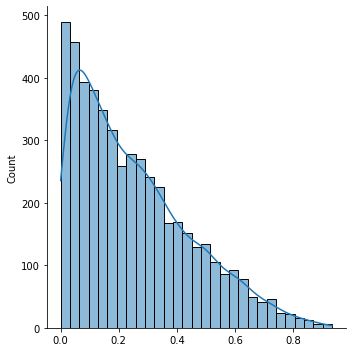

In [2]:
plt.figure(figsize=(8,8))
data = np.random.beta(1,3,5000)
sns.displot(data, kde=True)
plt.show()

In [3]:
data_boxcox = power_transform(data.reshape(-1,1), method='box-cox')


<Figure size 576x576 with 0 Axes>

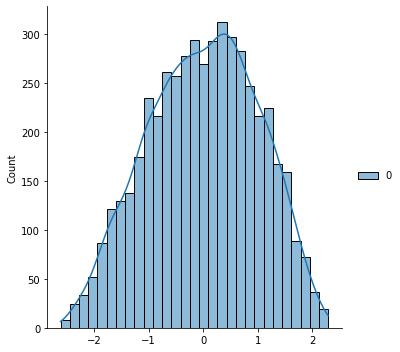

In [4]:
plt.figure(figsize = (8,8))
sns.displot(data_boxcox, kde=True)
plt.show()

The Box-Cox is defined as follows

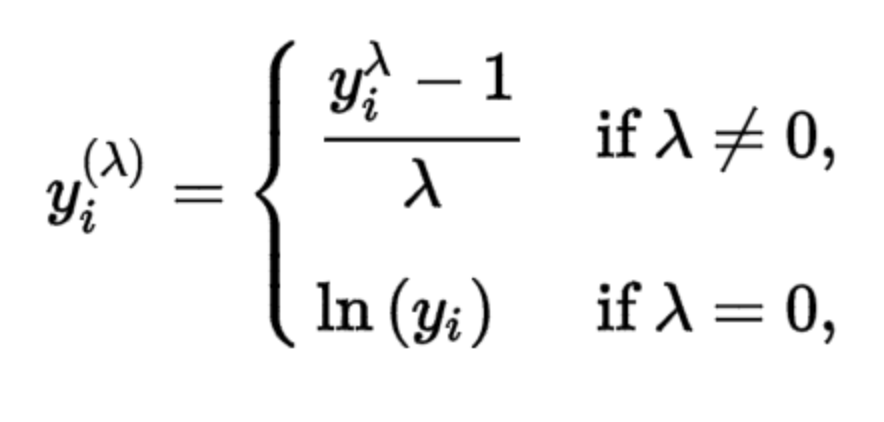

if λ = 0, the data is transformed by the natural log rather than the above formula. 

In summary, Box-Cox transformation is to transform data into normal distributed shape by minimizing the variation throught optimized λ. However, if λ is non-zero, the transfromed data is more difficult to interpret than the log transformed. So it may be a bad choice if data interpretation is required. 

# Ordinal and One-hot Encodings for Categorical Data

## Ordinal Encoding

In [5]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
df=asarray([['red'],['blue'],['yellow'],['brown']])
print(df)
# ordinal encoding class
encoder=OrdinalEncoder()
# transform
trans_df=encoder.fit_transform(df)
print(trans_df)

[['red']
 ['blue']
 ['yellow']
 ['brown']]
[[2.]
 [0.]
 [3.]
 [1.]]


## One-Hot Encoding

categorical variables with no ordinal relationship.

what is possible effect of forcing non-ordinal into ordinal.

what is one-hot encoding

In [6]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
df2=asarray([['red'],['blue'],['yellow'],['green'],['black']])
print(df2)
# define one hot encoding
onehot_encoder=OneHotEncoder(sparse=False)
# transform
trans_df2=onehot_encoder.fit_transform(df2)
print(trans_df2)

[['red']
 ['blue']
 ['yellow']
 ['green']
 ['black']]
[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


## Dummy Variable Encoding

Dummy variable is less redundant to One-Hot Encoding also required for some models.

In [7]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define the data
df3=asarray([['red'],['blue'],['green']])
# define one hot encoding
onehot_encoder2=OneHotEncoder(sparse=False, drop='first')
# fit and transform
trans_df3=onehot_encoder2.fit_transform(df3)
print(trans_df3)

[[0. 1.]
 [0. 0.]
 [1. 0.]]


## Breast cancer dataset

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# loading dataset
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'
dataset=pd.read_csv(url, header=None)
data=dataset.values

In [9]:
X=data[:,:-1].astype(str)
y=data[:,-1].astype(str)
print("Input variables", X.shape)
print("Target variable",y.shape)

Input variables (286, 9)
Target variable (286,)


In [10]:
ordinal_encoder=OrdinalEncoder()
X_ordinal=ordinal_encoder.fit_transform(X)
label_encoder=LabelEncoder()
y_label=label_encoder.fit_transform(y)

In [11]:
print("After encoding transformation\n")
print("Input variable\n",X_ordinal[:5,:])
print("\nTarget variable\n", y_label[:5])

After encoding transformation

Input variable
 [[2. 2. 2. 0. 1. 2. 1. 2. 0.]
 [3. 0. 2. 0. 0. 0. 1. 0. 0.]
 [3. 0. 6. 0. 0. 1. 0. 1. 0.]
 [2. 2. 6. 0. 1. 2. 1. 1. 1.]
 [2. 2. 5. 4. 1. 1. 0. 4. 0.]]

Target variable
 [1 0 1 0 1]


In [12]:
X_train, X_test, y_train, y_test=train_test_split(X_ordinal, y_label, test_size=0.25, random_state=1)
# define the model
model1=LogisticRegression()
# fit the training data
model1.fit(X_train, y_train)
# predict the model
y_predict=model1.predict(X_test)
# evaluate
accuracy=accuracy_score(y_test, y_predict)
print(accuracy)

0.75


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [13]:
onehot_encoder=OneHotEncoder()
X_onehot=onehot_encoder.fit_transform(X)
label_encoder=LabelEncoder()
y_label=label_encoder.fit_transform(y)
# train and test split
X_train, X_test, y_train, y_test=train_test_split(X_onehot, y_label, test_size=0.25, random_state=1)
# define the model
model2=LogisticRegression()
# fit the model
model2.fit(X_train, y_train)
# predict
y_predict=model2.predict(X_test)
# evaluate
accuracy=accuracy_score(y_test, y_predict)
print(accuracy)

0.7361111111111112
